Database setup and import

In [19]:
import pymysql
import seaborn as sns
from matplotlib import pyplot as plt   
import pandas as pd
import numpy as np

Database connection

In [3]:
connection = pymysql.connect(host="127.0.0.1",user="root",password="simpleapple",database="minicap")
#connect is a function which has 4 parameters

Verifying the successful import of the data

In [4]:
query = "select * from crime_data where Vict_Age>30"
df = pd.read_sql(query,connection)   #storing data in one df to plot


C:\Users\kumar\AppData\Local\Temp\ipykernel_7004\2861508084.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,connection)   #storing data in one df to plot


In [5]:
df.head()

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
2,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
3,200100510,01-05-2020,01-05-2020,Central,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,35,M,PARKING LOT,IC,800 S OLIVE ST,34.06,-118.24
4,200100514,01-05-2020,01-05-2020,Central,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",41,M,HOTEL,AA,700 W 7TH ST,34.05,-118.26


Data Exploration

In [18]:
query5 = "select Vict_Age, count(Crm_Cd) as countof from crime_data group by Vict_Age"
df5 = pd.read_sql(query5,connection)
print(df5)


    Vict_Age  countof
0         36        8
1         25       13
2         76        1
3         31       13
4         23       15
..       ...      ...
61        73        2
62        42        3
63        72        2
64        70        1
65        78        1

[66 rows x 2 columns]


C:\Users\kumar\AppData\Local\Temp\ipykernel_7004\2255258119.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df5 = pd.read_sql(query5,connection)


<Axes: xlabel='Vict_Age', ylabel='Count'>

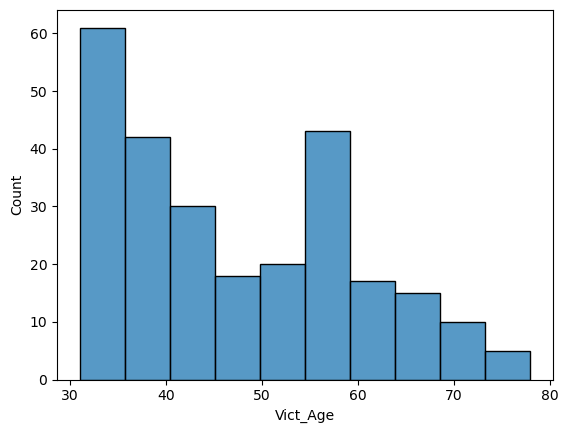

In [6]:
sns.histplot(df["Vict_Age"])

The above graph shows that with 30-40 age group most of the crime was occurred. 

Total number of records

In [7]:
print(df.count())
#print(df)

DR_NO          261
Date_Rptd      261
DATE_OCC       261
AREA_NAME      261
Crm_Cd         261
Crm_Cd_Desc    261
Vict_Age       261
Vict_Sex       261
Premis_Desc    261
Status         261
Location       261
LAT            261
LON            261
dtype: int64


In [8]:
print(df["Crm_Cd"].unique())

[624 745 740 930 341 354 230 442 761 350 310 440 330 900 210 888 886 420
 647 940 480 662 220 625 946 901 351 648 320 623 850]


GEOGRAPHICAL HOTSPOT FOR REPORTED CRIMES

In [9]:
df2 = df.groupby(['LAT','LON'])['AREA_NAME'].value_counts()
print(df2)

LAT    LON      AREA_NAME  
33.71  -118.29  Harbor          1
33.74  -118.29  Harbor          2
33.78  -118.31  Harbor          1
33.79  -118.29  Harbor          1
33.99  -118.31  77th Street     1
34.01  -118.45  Pacific         1
       -118.30  Southwest       1
34.02  -118.35  Southwest       1
34.03  -118.26  Central         4
34.04  -118.40  West LA         1
       -118.27  Central        10
       -118.26  Central        21
       -118.25  Central        32
       -118.24  Central        17
34.05  -118.30  Olympic         1
       -118.27  Central         1
       -118.26  Central        46
       -118.25  Central        40
       -118.24  Central        18
34.06  -118.38  West LA         1
       -118.34  Wilshire        1
       -118.26  Rampart         1
       -118.25  Central         3
       -118.24  Central        24
       -118.23  Central         3
34.07  -118.28  Rampart         1
       -118.25  Central         1
       -118.24  Central         1
       -118.23  Cent

<Axes: xlabel='LON', ylabel='LAT'>

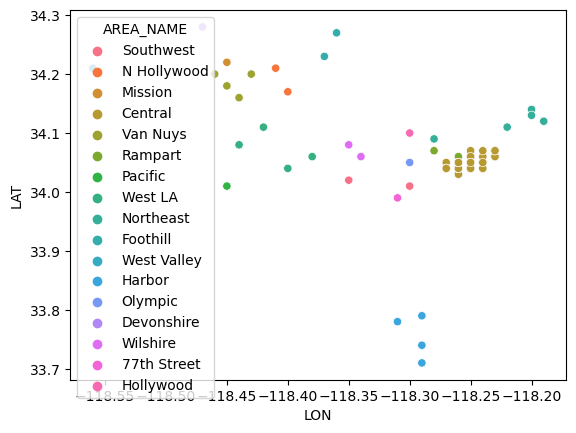

In [10]:

sns.scatterplot(y=df["LAT"],x=df["LON"],hue=df["AREA_NAME"])

We can analyze the above graph and say that most of the crimes have occurred in  central

In [11]:
query2 = "select distinct Crm_Cd from crime_data"
df2 = pd.read_sql(query2,connection)
print(df2)

    Crm_Cd
0      624
1      745
2      740
3      442
4      946
5      341
6      330
7      930
8      648
9      354
10     230
11     761
12     350
13     310
14     480
15     623
16     440
17     510
18     210
19     900
20     888
21     420
22     886
23     421
24     647
25     940
26     662
27     220
28     625
29     755
30     649
31     901
32     320
33     890
34     351
35     956
36     820
37     812
38     920
39     850
40     666
41     343


C:\Users\kumar\AppData\Local\Temp\ipykernel_7004\4164616890.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(query2,connection)


C:\Users\kumar\AppData\Local\Temp\ipykernel_7004\996853091.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql(query3,connection)


<Axes: xlabel='Crm_Cd'>

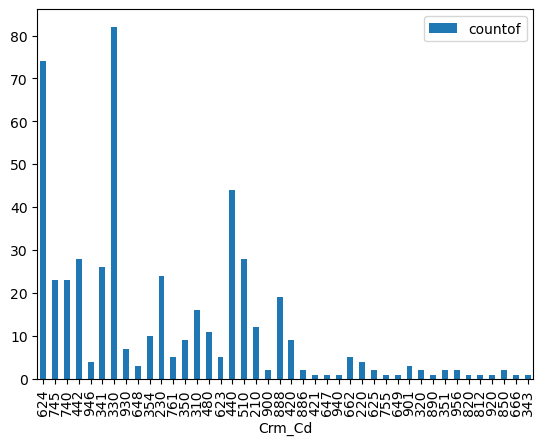

In [12]:
query3 = "select Crm_Cd, count(Crm_Cd) as countof from crime_data group by Crm_Cd"
df3 = pd.read_sql(query3,connection)
#print(df3)

df3.plot(x="Crm_Cd", y="countof", kind="bar")       


From the above graph we can analyse that for the Crm_cd 330 (BURGLARY FROM VEHICLE) there were more number of cases 

C:\Users\kumar\AppData\Local\Temp\ipykernel_7004\59788949.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = pd.read_sql(query4,connection)


<Axes: xlabel='Vict_Sex'>

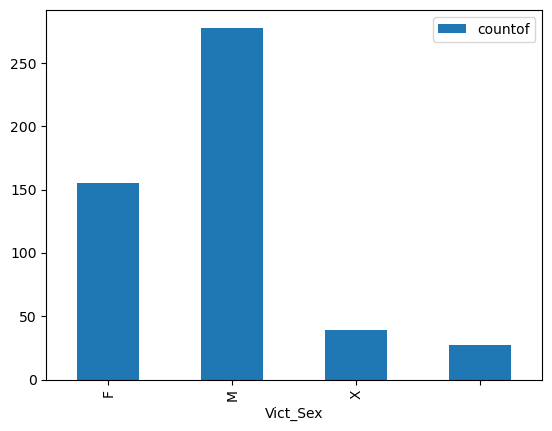

In [13]:
query4 = "select Vict_Sex, count(Crm_Cd) as countof from crime_data group by Vict_Sex"
df4 = pd.read_sql(query4,connection)
#print(df4)

#print(df4.isnull().sum())

df4.plot(x="Vict_Sex", y="countof", kind="bar")

From this graph we can make it out that most of the crimes were occurred with Male.

   month  countof
0     01      314
1     09        5
2     12       12
3     02      130
4     11        8
5     06        6
6     03        4
7     05        5
8     07        3
9     04        5
10    10        4
11    08        3


C:\Users\kumar\AppData\Local\Temp\ipykernel_7004\1394378076.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df6 = pd.read_sql(query6,connection)


<Axes: xlabel='month'>

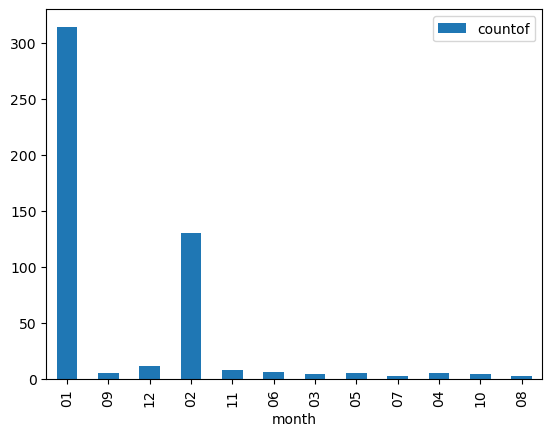

In [15]:
query6 = "select substring(DATE_OCC, 1,2) as month, count(Crm_Cd) as countof from crime_data group by month"
df6 = pd.read_sql(query6,connection)
print(df6)

df6.plot(x="month", y="countof", kind="bar")

In this graph we can easily figure it out that in which month the CRIME was HIGH. As it shows that JANUARY month had around 314 number of CRIMES.